<h1><center> Predict Winning Percentage of League of Legends Game </center></h1>
<center>By: Jason Wang and Eddie Zhou<center>  
<br>
<img src="Logo.jpg" alt="League of Legends">

<h2>Introduction</h2>  

With a player base of over 150 million unique registered users, League of Legends is by far the most popular game in the world.
Created by Riot Games, LoL has exploded globally since its inception in 2009. While it is well known in North America in Europe, the dominance of LoL in eastern countries, such as China or South Korea, brings more attention to it every year; for example, there have been amusement parks, restaurants, and even eSports towns built in China, all dedicated to the game. 


<h2>What is League of Legends?</h2>

<p>Although the game accentuates an entire culture of entertainment and magic, the game itself is much more binary. In a single game of Summoner's Rift, the primary game mode and map of League of Legends, two teams of 5 players compete against each other to destroy the another team's Nexus, a crystal structure in the center of their base, first. There are several obstacles inhibiting the completion of this task: first, obviously, is the enemy team themselves, who will do everything in their power to do the same to you; second, there are protective structures on the map, known as turrets, that must be broken first before the Nexus is destructible. Additionally, there are neutral objectives on the map that are obtainable by either team, and oftentimes there will be team fights to determine who will take the objective. More so than not, the team that wins these deciding fights will ultimately win the game.</p>  

<p>Before players load onto the map, they must first decide what champion, or character, they will use to represent them. There are a variety of factors that go into this decision, but for the sake of statistical data analysis, they are negligible and will not ultimately affect the main factors that will predict which team will win. However, during the game, important statistics such as total gold, experience, kills and deaths, and structures destroyed are tracked, so we will be using these factors to predict if the blue side team won or lost.</p> 

If you would like to learn more about the game, check out the official website and game tutorial here: https://www.leagueoflegends.com/en-us/how-to-play/?_gl=1*6dglwy*_ga*NTUyMDQyNDMyLjE2Mzk2MDk5MTQ.*_ga_FXBJE5DEDD*MTYzOTYwOTkxMy4xLjEuMTYzOTYxMDA2OC41OQ..

<h2>Data curation, Parsing, and Management</h2>

To start our investigation, we first obtained data on 10 thousand unique matches, all of which are at a high rank. In League of Legends, there are 8 possible tiers: Bronze, Silver, Gold, Platinum, Diamond, Master, Grandmaster, and Challenger. To ensure quality data, all of the match data takes place between the ranks of high Diamond and low Master. The dataset keeps track of 19 unique factors for both teams, as well as the unique game id and if the blue team won or lost. 


In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("high_diamond_ranked_10min.csv")

df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


The data shown above is the first 5 rows the ranked dataset.

Each of the column provided by the data has a specific purpose:

* gameId - Each game is assigned an ID number by Riot to identify each match
* blueWins - Number of games won by the blue team
* blueWardsPlaced - Number of wards placed by the blue team
* blueWardsDestroyed - Number of wards destroyed by the blue team
* blueFirstBlood - Number of first bloods obtained by the blue team
* blueKills - Number of kills obtained by the blue team
* blueDeaths - How many times players on the blue team died
* blueAssists - How many assists players on the blue team obtained
* blueEliteMonsters - Number of monsters killed by the blue team
* blueDragons - Number of dragons killed by the blue team
* blueHeralds - Number of heralds killed by the blue team
* blueTowersDestroyed - Number of towers destroyed by the blue team
* blueTotalGold - Total gold obtained by the blue team
* blueAvgLevel - Average level of players on the blue team
* blueTotalExperience - Total experience obtained by the blue team
* blueTotalMinionsKilled - Total minions killed by the blue team
* blueTotalJungleMinionsKilled - Total jungle monsters killed by the blue team
* blueGoldDiff - Total gold difference for the blue team vs. red team
* blueExperienceDiff - Total experience difference for the blue team vs. red team
* blueCSPerMin - Total CS per minute from the blue team
* blueGoldPerMin - Total gold per minute from the blue team

Now you might be wondering why only the blue team information is listed. This brings us to the next step, Data Wrangling!

<h2>Data Wrangling</h2>

For the dataset we have decided to remove one side of the map and limit the data to only the blue side. 
Because most of the red side data is just the inverse of the blue side data it is simpler to eliminate
that redundant information. An example of this would be the gold difference for the blue side vs. the red side;
if the blueGoldDiff was 643, then the redGoldDiff would just be -643.

Below is the code for grabbing only the blue side data. An extra step was also removing the gameID; because we
are only looking at the stats for the blue team, the game ID does not impact the analysis.

In [286]:
df = df.iloc[:, 1:21]

df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0


Now that we have narrowed it down to the factors of just one team, we can start cleaning it up to get rid of categories that are not relevant or redundant. In this dataset, the "per minute" columns take one of the existing columns and divide it by 10. As shown below there are columns which only differ by a multiple of 10 due to the data only representing the first 10 minutes of every game.

In [287]:
df[['blueTotalMinionsKilled', 'blueCSPerMin']]

,blueTotalMinionsKilled,blueCSPerMin
0,195,19.5
1,174,17.4
2,186,18.6
3,201,20.1
4,210,21.0
...,...,...
9874,211,21.1
9875,233,23.3
9876,210,21.0
9877,224,22.4


In [288]:
df[['blueTotalGold', 'blueGoldPerMin']]

,blueTotalGold,blueGoldPerMin
0,17210,1721.0
1,14712,1471.2
2,16113,1611.3
3,15157,1515.7
4,16400,1640.0
...,...,...
9874,17765,1776.5
9875,16238,1623.8
9876,15903,1590.3
9877,14459,1445.9


Since this seems redundant, we will remove the "blueCSPerMin" and "blueGoldPerMin" columns. 

In [289]:
df.drop(['blueCSPerMin', 'blueGoldPerMin'], axis = 1)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469
9875,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888
9876,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877
9877,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085


<h2>Exploratory Data Analysis</h2>

If you would like to learn about EDA: https://en.wikipedia.org/wiki/Exploratory_data_analysis

Now that we have completed wrangling the dataset, it is time to start exploring the data! The purpose of exploring this data is to figure out if there are any correlations between the game stats vs. the win percentage of the blue team. We will take a look at the win percentage of the blue team that had a gold lead during the game, the win percentage of the blue team that obtained First Blood, the win percentage of the blue team that had heralds, and some more comparisons. 

Now, we can look further into the data and try and pull conclusions about a team's victory based on statistical advantages. In League of Legends, two of the best statistics that will give you an advantageous position is having a gold lead, or an experience lead. These statistics are reflected in the blueGoldDiff and blueExperienceDiff columns, where the value reflected is the blue team's positive or negative difference in either category. Using these columns, and the column that tells if the blue team won or lost, we are able to calculate the average win rate of blue team if they have a gold lead by dividing the total number of games where blue WINS and HAS a gold lead, by solely the total WINS of blue team.

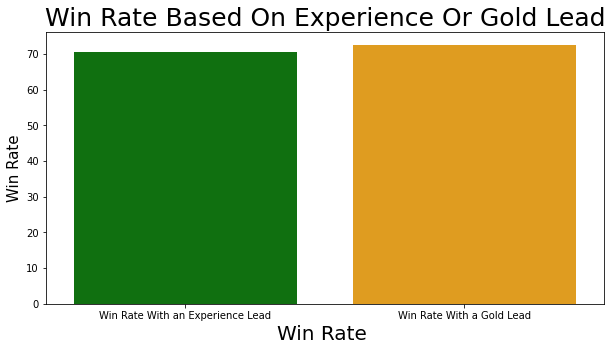

In [290]:
plt.figure(figsize=(10, 5))

# Getting blue and red side win rate
blue_total = 0
red_total = 0
 
for index, row in df.iterrows():
    if (row['blueWins']):
        blue_total += 1
    else:
        red_total += 1
 
blue_wr = blue_total / len(df.index)
red_wr = red_total / len(df.index)

blue_wr_gold = 0
blue_wr_exp = 0
 
for index, row in df.iterrows():
    if row['blueGoldDiff'] > 0 and row['blueWins'] == 1:
        blue_wr_gold += 1
    if row['blueExperienceDiff'] > 0 and row['blueWins'] == 1:
        blue_wr_exp += 1
 
blue_wr_gold /= blue_total
blue_wr_exp /= blue_total
blue_wr_gold *= 100
blue_wr_exp *= 100
# print(blue_wr_exp, blue_wr_gold)
 
# plotting the win rates
 
ax = sns.barplot(x = ["Win Rate With an Experience Lead", "Win Rate With a Gold Lead"], y = [blue_wr_exp, blue_wr_gold], palette = ["Green", "Orange"])
plt.xlabel("Win Rate ", fontsize = 20)
plt.ylabel("Win Rate", fontsize = 15)
plt.title("Win Rate Based On Experience Or Gold Lead",fontsize = 25)
plt.show()


For the next analysis we will calculate the win percentage of the blue team depending on First Bloods in the game. First Bloods are when a team gets the first kill of the game. This kill gives an extra 100 gold to the player who obtained the kill, and also gives a slight mental edge at the start of the match.

The way that we calculate the win percentage is by first summing up the number of wins where the blue team had first blood, and also summing the number of first bloods that the blue team had in total regardless of win/loss. We then take the first number and divide by the total in order to get the win rate based on first blood.

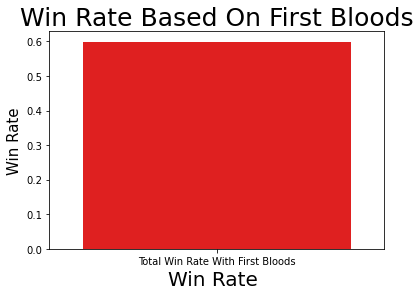

In [291]:
blue_wins_with_fb = len(df[(df['blueFirstBlood'] == 1) & (df['blueWins'] == 1)])
total_blue_fb = len(df[(df['blueFirstBlood'] == 1)])

blue_wr_fb = blue_wins_with_fb / total_blue_fb

ax = sns.barplot(x = ["Total Win Rate With First Bloods"], y = [blue_wr_fb], palette = ["Red"])
plt.xlabel("Win Rate ", fontsize = 20)
plt.ylabel("Win Rate", fontsize = 15)
plt.title("Win Rate Based On First Bloods",fontsize = 25)
plt.show()

The next analysis is similar to the win rate based on First Bloods, however, it is using something within the game called Heralds. Heralds are a monster within the game which when secured will allow for the team to spawn a monster near a tower and do significant damage to it. If the herald was secured early enough within the game, it is possible to obtain a second one before the 20 minute mark when something called the Baron spawns. The herald is an important monster in the beginning stages of the game because towers have something called "shields" which have 5 sections and at each broken stage it gives 160 gold. When the herald is spawned and does damage to a tower it takes town around 2 and a half "shields" off the tower which is 320 gold, if it destroys the tower while in the process that adds an extra 150 gold split between the nearest players.

This early advantage could be enough to alter the later stages of the game, and even the result! Below we calculate the number of wins when the blue team had obtained one or more heralds. We then also calculate the total heralds obtained by the blue team and then divide the wins by the total to get the win percentage when heralds are secured.

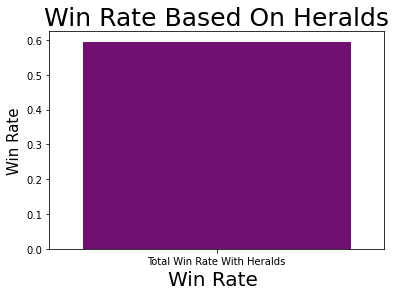

In [292]:
blue_wins_with_heralds = len(df[(df['blueHeralds'] >= 1) & (df['blueWins'] == 1)])
total_blue_heralds = len(df[(df['blueHeralds'] >= 1)])

blue_wr_heralds = blue_wins_with_heralds / total_blue_heralds

ax = sns.barplot(x = ["Total Win Rate With Heralds"], y = [blue_wr_heralds], palette = ["Purple"])
plt.xlabel("Win Rate ", fontsize = 20)
plt.ylabel("Win Rate", fontsize = 15)
plt.title("Win Rate Based On Heralds",fontsize = 25)
plt.show()

<h2>Hypothesis Testing and Machine Learning</h2>

For this section we have decided to see how accurately we can predict the win percentage of a game using Multiple Linear Regression. We are going to use the sklearn module to train and then test the data. For the first portion we import that required sklearn functions that we will be using.

If you would like to learn more about the sklearn module and the LinearRegression library you can go to these links here:

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* https://scikit-learn.org/stable/

Because we will be predicting wins through Multiple Linear Regression we want to first separate the attributes that we are using from the attribute we are trying to predict. The code below will take the wins column and save it as 'y' and the remaining columns of attributes and save it as 'x'.

In [293]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = df['blueWins']
x = df.drop(['blueWins'], axis=1)

y

0       0
1       0
2       0
3       0
4       0
       ..
9874    1
9875    1
9876    0
9877    0
9878    1
Name: blueWins, Length: 9879, dtype: int64

In [294]:
x

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5
9875,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8
9876,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3
9877,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9


The next step after diciding the attributes and labels would be to split the data into training and testing parts. For this we use the train_test_split() function.After training the data we can then apply the Linear Regression model onto our training data. First we create a LinearRegression object and then fit the training data. 

Because this data has multiple variables to take into account, the regression model will attempt to find the best coefficients for each attribute. When printing out which coefficients were assigned to which attribute we can see that for each attribute there is either a slight increase or decrease in wins. I.E for each increase in blueDragons there is a increase by 0.049 in wins. Similarly, each increase in level lowers the wins by 0.026.



In [295]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

LR = LinearRegression()
LR.fit(x_train,y_train)

coeff_df = pd.DataFrame(LR.coef_, x.columns, columns=['Coefficient'])
coeff_df =coeff_df.sort_values(['Coefficient'], ascending = False)

print(coeff_df)

                              Coefficient
blueDragons                      0.049479
blueEliteMonsters                0.036060
blueFirstBlood                   0.020756
blueWardsDestroyed               0.001220
blueTotalJungleMinionsKilled     0.000910
blueGoldDiff                     0.000054
blueExperienceDiff               0.000043
blueTotalGold                    0.000038
blueGoldPerMin                   0.000004
blueTotalExperience             -0.000002
blueCSPerMin                    -0.000078
blueWardsPlaced                 -0.000162
blueTotalMinionsKilled          -0.000783
blueAssists                     -0.001463
blueKills                       -0.006100
blueDeaths                      -0.009051
blueHeralds                     -0.013418
blueAvgLevel                    -0.026292
blueTowersDestroyed             -0.070200


Now after fitting the regression data and coefficients we can use the test data for wins to predict wins in the future. We use LinearRegression predict function on the x_test data to predict the y_prediction values.

Below we can see the predicted values compared with the original win values. After creating the prediction values we can now calculate the accuracy of our model using R2 score, Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error.

In [296]:
y_prediction =  LR.predict(x_test)

test = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})
print(test)

      Actual  Predicted
4818       0   0.183811
952        1   0.662238
9023       1   0.606676
5212       1   0.555595
7244       0   0.128631
...      ...        ...
473        0  -0.123759
3071       1   0.565454
3937       0   0.482940
3032       0   0.304965
5118       1   0.761540

[1976 rows x 2 columns]


In [297]:
score = r2_score(y_test,y_prediction)

mean_s_error = mean_squared_error(y_test, y_prediction)

print('R2 Score:', score)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

R2 Score: 0.28904432126170365
Mean Absolute Error: 0.37146057738630983
Mean Squared Error: 0.17773436761746905
Root Mean Squared Error: 0.42158554009532756


When looking at the final results of our prediction model we can see that the model is pretty accurate! We see from the model prediction that the Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error are all very low meaning that the prediction accuracy is high. The Root Mean Squared Error is 0.4 which means that it is between 0.2 and 0.5 which is a rule of thumb for telling that the model can predict the outcome accurately.

While the prediction accuracy of the model is good, there is also a  very low R2 Score sitting at 0.2. This most likely means that while the model can predict the outcome of the current data, the future outcomes of the data are still not guaranteed. This result makes perfect sense when it comes to predicting the win chances within a Diamond elo League of Legends game. As players who have both hit Masters elo we can guarantee that games are very easily swung in the opposite direction and outcomes are always up in the air. The model cannot take into account human error, players leaving the game, or any other random factors that may cause a win or loss. However, overall, given data of a game the model does well when deciding if a team is going to win or lose!

<h2>Conclusion</h2>

In conclusion, a match of League of Legends has numerous different factors that play a part in it. Both teams will constantly battle for an advantageous position in all of them, in hopes of using that lead to eventually win the game. Although there are also many outside, external factors that can't be tracked, such as team mentality and disconnected players, using these statistical factors provides a great dataset that can be used to predict if blue team wins or loses. 

In our own analysis, we first cleaned the data to take out red side data, as much of it is inversely related to blue side data. We also removed the unique gameID columns, as it is not needed. Finally, we removed the "PerMin" data columns, as they are the same as the "Total" columns, just divided by 10. Then we illustrated the importance of gold and experience difference, first blood rate, and herald control within the first 10 minutes of the game, all of which showed that if you had an advantageous position in any of these factors, you were more likely to win than lose. Finally, using Multiple Linear Regression, we trained a machine learning model to predict if blue side won or lost based on the given blue side statistics. After fitting the model with the data, we were able to conclude that the model was fairly accurate in predicting the correct game result. 
